# Proyecto Final Ciencia de datos
##Fuentes Hernandez Brian Eduardo
318825256

# Objetivo
Implementar una solución basada en Machine Learning para 2 bases de datos diferentes utilizando una regresión  logística.

# Primera base de datos
Esta base de datos fue obtenida de
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [ ]:
from google.colab import files
files.upload()  # subimos nuestro token de kaggle para poder trabajar en la base de datos


Saving kaggle (1).json to kaggle (1) (3).json


{'kaggle (1) (3).json': b'{"username":"brianff","key":"fe633cc8f8f23a0e90b00d3ef2663f1d"}'}

In [ ]:
#configuramos con los permisos adecuados
!mkdir -p ~/.kaggle
!cp "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#descargamos y descomprimimos nuestro archivo
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 89% 59.0M/66.0M [00:00<00:00, 590MB/s]
100% 66.0M/66.0M [00:00<00:00, 477MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd
df = pd.read_csv("creditcard.csv")
df.head()#visualizamos que se haya importado bien


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape#vemos que nuestra base de datos tiene 284807 filas y 31 columnas

(284807, 31)

In [ ]:
df.isnull().values.any()#comprobamos que no haya valores nulos

np.False_

In [ ]:
df.isnull().sum() #en este caso no hubo por lo que podemos trbajar directamente

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Calculamos valores atípicos usando el método del IQR (rango intercuartílico). Para cada columna:

In [ ]:
for columna in df:
    cuartil_1 = df[columna].quantile(0.25)
    cuartil_3 = df[columna].quantile(0.75)
    rango_iqr = cuartil_3 - cuartil_1
    limite_inferior = cuartil_1 - 1.5 * rango_iqr
    limite_superior = cuartil_3 + 1.5 * rango_iqr

    atipicos = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    cantidad_atipicos = len(atipicos)
    total_filas = len(df)
    porcentaje_atipicos = (cantidad_atipicos / total_filas) * 100

    print(f"Columna: {columna}")
    print(f"Cantidad de valores atípicos: {cantidad_atipicos}")
    print(f"Total de filas: {total_filas}")
    print(f"Porcentaje de atípicos: {porcentaje_atipicos:.2f}%\n")


Columna: Time
Cantidad de valores atípicos: 0
Total de filas: 284807
Porcentaje de atípicos: 0.00%

Columna: V1
Cantidad de valores atípicos: 7062
Total de filas: 284807
Porcentaje de atípicos: 2.48%

Columna: V2
Cantidad de valores atípicos: 13526
Total de filas: 284807
Porcentaje de atípicos: 4.75%

Columna: V3
Cantidad de valores atípicos: 3363
Total de filas: 284807
Porcentaje de atípicos: 1.18%

Columna: V4
Cantidad de valores atípicos: 11148
Total de filas: 284807
Porcentaje de atípicos: 3.91%

Columna: V5
Cantidad de valores atípicos: 12295
Total de filas: 284807
Porcentaje de atípicos: 4.32%

Columna: V6
Cantidad de valores atípicos: 22965
Total de filas: 284807
Porcentaje de atípicos: 8.06%

Columna: V7
Cantidad de valores atípicos: 8948
Total de filas: 284807
Porcentaje de atípicos: 3.14%

Columna: V8
Cantidad de valores atípicos: 24134
Total de filas: 284807
Porcentaje de atípicos: 8.47%

Columna: V9
Cantidad de valores atípicos: 8283
Total de filas: 284807
Porcentaje de atí

estos datos son muy importantes por lo que no los eliminamos ya que estos son los posibles fraudes


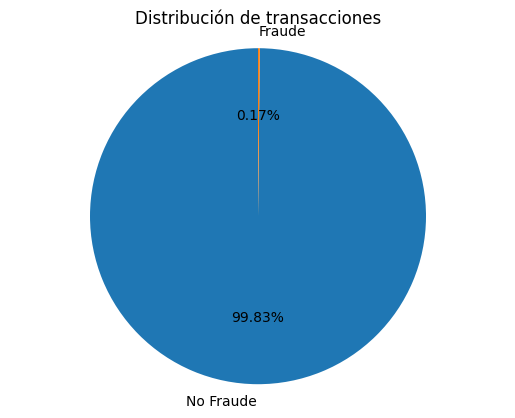

In [ ]:
import matplotlib.pyplot as plt
#vemos en una grafica la distribución puede ser en otras representaciones pero escogi una de pastel
outcome_counts = df["Class"].value_counts()
plt.pie(outcome_counts,
        labels=["No Fraude", "Fraude"],
        autopct="%1.2f%%",
        startangle=90)
plt.title("Distribución de transacciones")
plt.axis("equal")
plt.show()


Y justamente conjunto de datos presenta un desequilibrio considerable. Ahora analizaremos las transacciones fraudulentas (1) y no fraudulentas (0).


In [ ]:
fraudes = df[df.Class == 1]
normal = df[df.Class == 0]
fraudes.shape

(492, 31)

Ahora buscamos la correlación

In [ ]:
df.corr

<bound method DataFrame.corr of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]>

Text(0.5, 1.0, 'mapa de calor de la correlación')

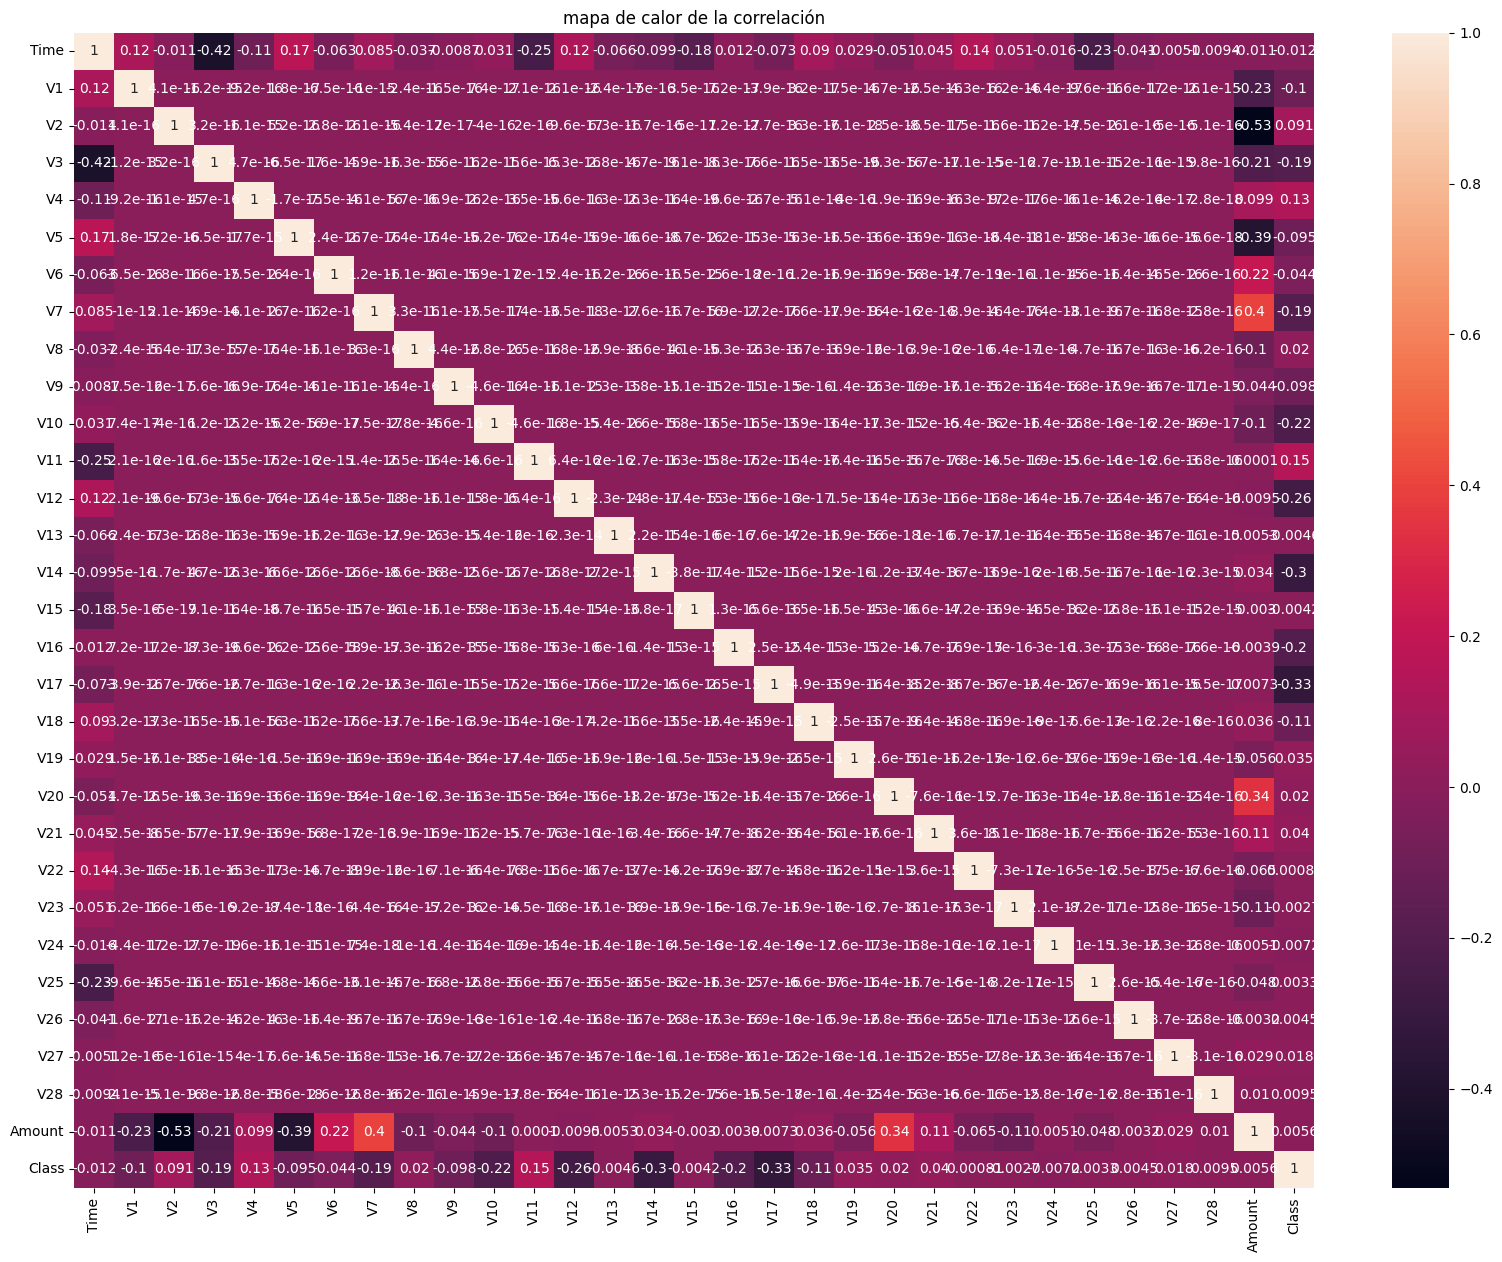

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True)
plt.title("mapa de calor de la correlación")

Text(0.5, 1.0, 'distribución de transacciones')

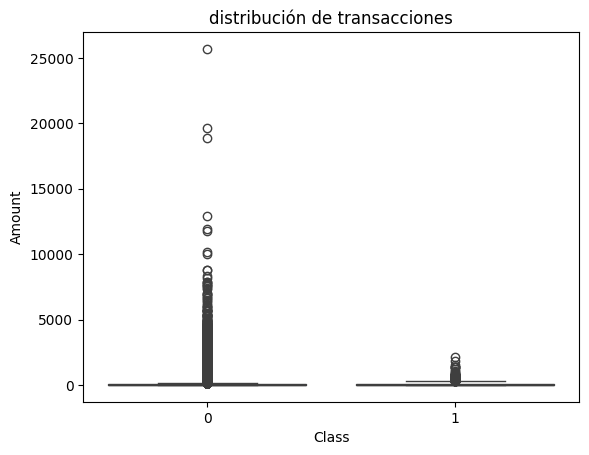

In [ ]:
sns.boxplot(x = 'Class', y = 'Amount', data = df)
plt.title("distribución de transacciones")

Verificamos la cantidad de dinero involucrada en cada tipo de transacción (para ver cuanto se volaron los estafadores)


In [ ]:
fraudes.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


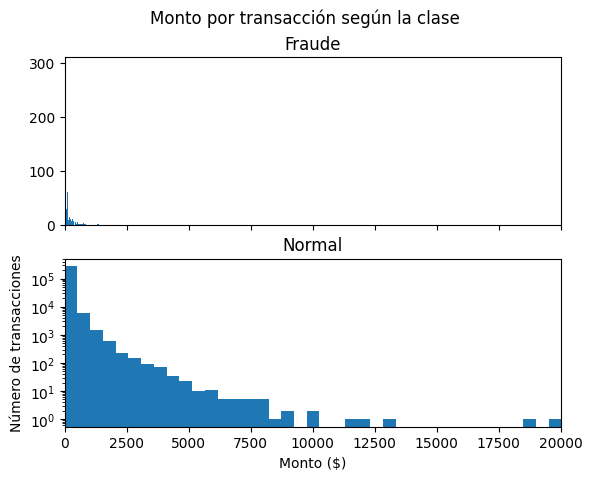

In [ ]:
#comparamos graficamente
figura, (eje1, eje2) = plt.subplots(2, 1, sharex=True)
figura.suptitle('Monto por transacción según la clase')
numero_bins = 50
#histograma para transacciones fraudulentas
eje1.hist(fraudes.Amount, bins=numero_bins)
eje1.set_title('Fraude')
#histograma para transacciones normales
eje2.hist(normal.Amount, bins=numero_bins)
eje2.set_title('Normal')
plt.xlabel('monto ($)')
plt.ylabel('número de transacciones')
plt.xlim((0, 20000))
#escala logarítmica en Y para visualizar mejor
plt.yscale('log')
plt.show()

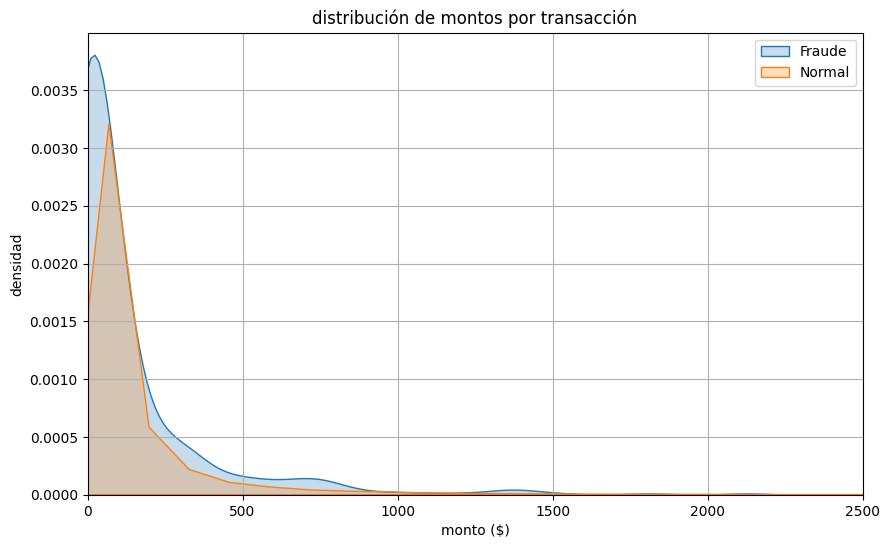

In [ ]:
#Distribución de los montos de transacción
plt.figure(figsize=(10, 6))
sns.kdeplot(data=fraudes, x="Amount", label="Fraude", fill=True)
sns.kdeplot(data=normal, x="Amount", label="Normal", fill=True)

plt.title("distribución de montos por transacción")
plt.xlabel("monto ($)")
plt.ylabel("densidad")
plt.xlim(0, 2500)
plt.legend()
plt.grid(True)
plt.show()

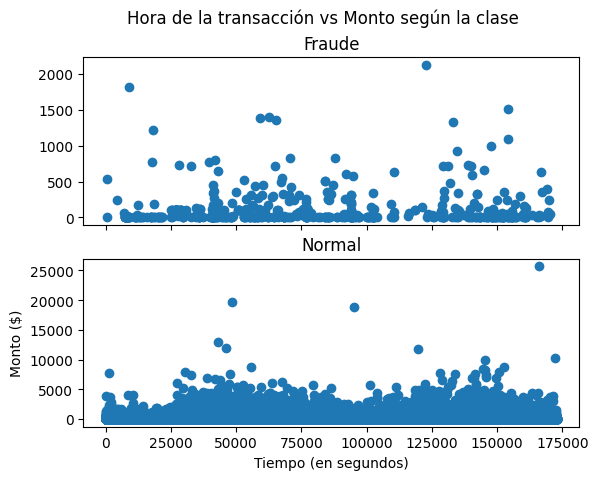

In [ ]:
figura, (eje1, eje2) = plt.subplots(2, 1, sharex=True)
figura.suptitle('Hora de la transacción vs Monto según la clase')

#diagrama de dispersión para transacciones fraudulentas
eje1.scatter(fraudes.Time, fraudes.Amount)
eje1.set_title('Fraude')

#diagrama de dispersión para transacciones normales
eje2.scatter(normal.Time, normal.Amount)
eje2.set_title('Normal')
plt.xlabel('Tiempo (en segundos)')
plt.ylabel('Monto ($)')
plt.show()

El tiempo no parece ser un factor crucial para distinguir entre casos normales y fraudulentos. Por lo tanto, lo dejaré de lado.

In [ ]:
data = df.drop(['Time'], axis=1)

Los montos numéricos en casos de fraude y normales difieren mucho, por eso los escalaremos.


In [ ]:
from sklearn.preprocessing import StandardScaler

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

## Construimos el modelo

Utilizaremos autocodificadores para el modelo de detección de fraude. Mediante autocodificadores, entrenamos la base de datos únicamente para aprender la representación de las transacciones no fraudulentas.

La razón detrás de la aplicación de este método es permitir que el modelo aprenda la mejor representación de los casos no fraudulentos para que pueda distinguir automáticamente los otros casos.

In [ ]:
df = pd.concat([normal, fraudes]).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis=1).values  #variables independientes
Y = df["Class"].values                 #variable dependiente (clase)


Dividimos los datos en un 80% de entrenamiento y un 20% de prueba(prueba error fue obtenido y ese porcentaje  dio mejor efectividad)

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42#número comun usado
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train_fraud = X_train[X_train.Class == 1]
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(227451, 29)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers

input_layer = Input(shape=(x_scale.shape[1],))  # Usa 29 o lo que tengas realmente

# Encoder
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

# Decoder
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

##capa de salida
output_layer = Dense(x_scale.shape[1], activation='relu')(decoded)
#creamos el modelo autoencoder
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")#se utiliza como función de pérdida porque el objetivo del autoencoder es reconstruir las entradas lo mejor posible

Entrenamos a 10 epocas

In [ ]:
from sklearn.preprocessing import MinMaxScaler#visto muchas veces en clase
x = data.drop(["Class"], axis=1)
y = data["Class"].values

x_scale = MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

autoencoder.fit(x_norm[0:2000], x_norm[0:2000],
                batch_size = 256, epochs = 10,
                shuffle = True, validation_split = 0.20);

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.9425 - val_loss: 0.8403
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9420 - val_loss: 0.8398
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9412 - val_loss: 0.8392
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9408 - val_loss: 0.8387
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9406 - val_loss: 0.8382
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9397 - val_loss: 0.8376
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9392 - val_loss: 0.8371
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9387 - val_loss: 0.8365
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9376 - val_loss: 0.8360
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9370 - val_loss: 0.8354


Obtenemos la representación oculta


In [ ]:
from keras.models import Sequential
#crreamos una red secuencial que reutiliza las capas del codificador del autoencoder
representacion_oculta = Sequential()
representacion_oculta.add(autoencoder.layers[0])  #capa de entrada
representacion_oculta.add(autoencoder.layers[1])  #primera capa
representacion_oculta.add(autoencoder.layers[2])  #segunda capa

In [ ]:
rep_normal = representacion_oculta.predict(x_norm[:3000])
rep_fraude = representacion_oculta.predict(x_fraud)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Obtención de los datos de representación


In [ ]:
import numpy as np
rep_x = np.append(rep_normal, rep_fraude, axis = 0)
y_n = np.zeros(rep_normal.shape[0])
y_f = np.ones(rep_fraude.shape[0])
rep_y = np.append(y_n, y_f)

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)

# Modelo final


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#Entrenamos modelo de regresión logística
modelo = LogisticRegression(solver="lbfgs").fit(train_x,train_y)

#Predecimos con los datos de validación
pred_y = modelo.predict(val_x)

#Visualizamos el reporte
print("")
print("Reporte de clasificación:")
print(classification_report(val_y, pred_y))

#imprimimos exactitud del modelo
print("")
print("Precisión del modelo (accuracy):", accuracy_score(val_y, pred_y))



Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       751
         1.0       1.00      0.59      0.74       122

    accuracy                           0.94       873
   macro avg       0.97      0.80      0.86       873
weighted avg       0.95      0.94      0.94       873


Precisión del modelo (accuracy): 0.9427262313860252


vemos que tiene una presición bastante buena

# Segunda base de datos


el objetivo de esta segunda base es trabajar con menores datos y ver si aplicando la regresión logistica obtenemos los mismos resultados

esta base fue obtenida de
https://github.com/amankharwal/Website-data/blob/7ce2fbb5a5f9900cc0e28b7c34d29f4c202dc273/payment_fraud.csv

In [24]:
import pandas as pd#importamos las mismas bibliotecas del anterior
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [25]:
from google.colab import files#importamos los datos
uploaded = files.upload()
df = pd.read_csv('payment_fraud.csv')
df.head()

Saving payment_fraud.csv to payment_fraud (2).csv


,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


Analizamos igual que en el aterior para ver la estructura de esta base de datos

In [26]:
df.shape

(39221, 6)

In [27]:
df.isnull().values.any()

np.False_

vemos que igual esta limpio sin embargo podriamos ver si tiene filas duplicadas

In [28]:
df.duplicated().sum()
df = df.drop_duplicates()

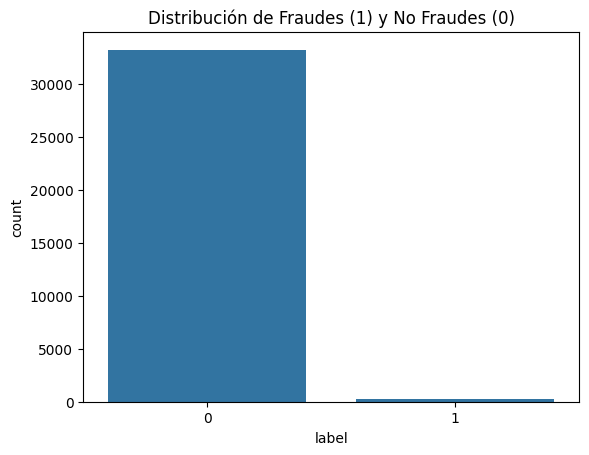

In [29]:
# Distribución
sns.countplot(data=df, x="label")
plt.title("Distribución de Fraudes (1) y No Fraudes (0)")
plt.show()

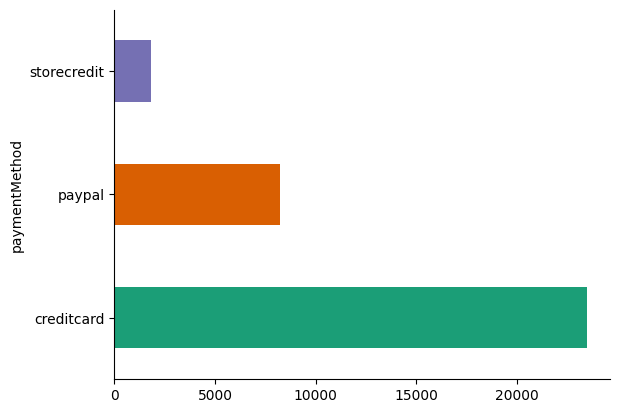

In [30]:
df.groupby('paymentMethod').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

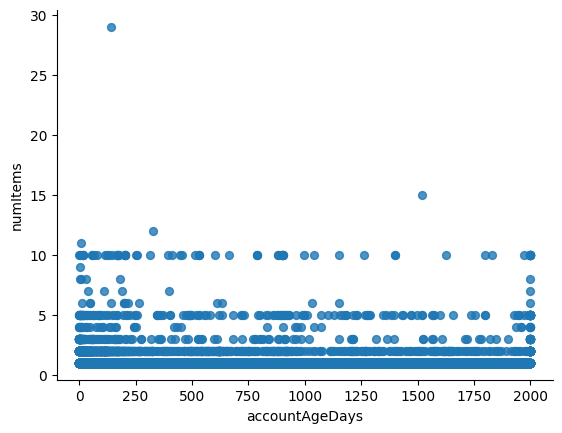

In [31]:
df.plot(kind='scatter', x='accountAgeDays', y='numItems', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

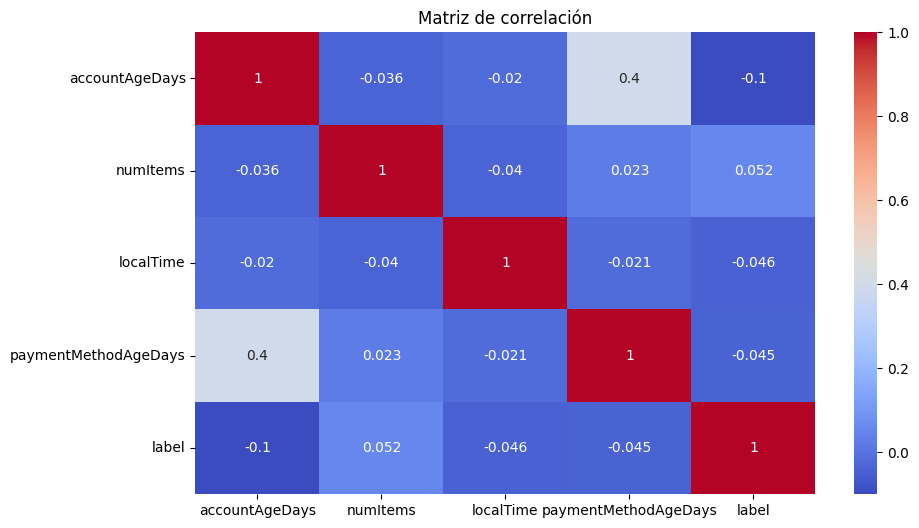

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()



Ahora preparamos el modelo

In [33]:
# Separar x e y
X = df.drop("label", axis=1)
y = df["label"]

#normalizamos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


ValueError: could not convert string to float: 'paypal'

In [34]:
df = pd.get_dummies(df, columns=["paymentMethod"], drop_first=True)
#habia olvidado transformar convertir texto en datos numéricos

In [35]:
#cargamos lo mismo y ahora si jala
X = df.drop("label", axis=1)
y = df["label"]

#normalizamos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
#usamos el modelo de regresión
modelo_rl = LogisticRegression()
modelo_rl.fit(X_train, y_train)


LogisticRegression()

In [160]:
#tambien podemos usar el modelo de  árbol de decisión
from sklearn.tree import DecisionTreeClassifier
modelo_arbol = DecisionTreeClassifier(max_depth=4)
modelo_arbol.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#predicción
y_pred = modelo_rl.predict(X_test)

# Reporte de desempeño
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión general (accuracy):", accuracy_score(y_test, y_pred))


Matriz de confusión:
 [[6640    0]
 [  59    0]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6640
           1       0.00      0.00      0.00        59

    accuracy                           0.99      6699
   macro avg       0.50      0.50      0.50      6699
weighted avg       0.98      0.99      0.99      6699

Precisión general (accuracy): 0.9911927153306463


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


A pesar que tuvimos un acuraccy del .99 no esta aprendiendo de los fraudes,vemos que de igual forma debemos de separar las clases ya que no estaba precidiendo intentamos de nuevo

In [39]:
# Separar clases
df_fraudes = df[df["label"] == 1]
df_no_fraudes = df[df["label"] == 0]

print("Fraudes:", len(df_fraudes))
print("No fraudes:", len(df_no_fraudes))


Fraudes: 294
No fraudes: 33201


In [40]:
#submuestreamos la clase mayoritaria
df_no_fraudes_sample = df_no_fraudes.sample(n=len(df_fraudes), random_state=42)

# Unimos en un nuevo dataframe balanceado
df_balanceado = pd.concat([df_fraudes, df_no_fraudes_sample]).sample(frac=1, random_state=42)


In [41]:
#separamos variables y etiqueta
X_bal = df_balanceado.drop("label", axis=1)
y_bal = df_balanceado["label"]

#escalamos
scaler = MinMaxScaler()
X_bal_scaled = scaler.fit_transform(X_bal)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X_bal_scaled, y_bal, test_size=0.2, random_state=42
)


In [48]:
#modelo con pesos balanceados
modelo_balanceado = LogisticRegression(class_weight='balanced')
modelo_balanceado.fit(X_train, y_train)

#predicciones
y_pred = modelo_balanceado.predict(X_test)

#evaluamos
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[34 20]
 [ 0 64]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.63      0.77        54
           1       0.76      1.00      0.86        64

    accuracy                           0.83       118
   macro avg       0.88      0.81      0.82       118
weighted avg       0.87      0.83      0.82       118



In [49]:
print("Precisión general (accuracy):", accuracy_score(y_test, y_pred))

Precisión general (accuracy): 0.8305084745762712


nuestra precision fue mas baja que en el que nos basamos sin embargo igual fue un buen acuracy,podriamos generar como en el caso anterior autoencoders para poder mejorar nuestro programa o algun modelo de regresión  pre entrenada como en el caso del ejemplo que nos basamos (https://amanxai.com/2020/08/04/fraud-detection-with-machine-learning/)